# Cells 1-7: the given code

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from a3_solution import displayConfusionMatrix
import math

In [2]:
dataFolder = "E:\\Parnasa\\Teaching\\DataMining\\DataMining_5780\\MeirLastPass\\targilim\\a4-data\\"
data = pd.read_csv(dataFolder + "mnist_test.csv", header=None).to_numpy()
print(data.shape)

(10000, 785)


In [3]:
X = data[:, 1:]
y = data[:, 0]
resolution = int(math.sqrt(X.shape[1]))
print(X.shape, y.shape, resolution)

(10000, 784) (10000,) 28


In [4]:
# Let's classify two digits
digit1 = 7
digit2 = 9
fltr = np.logical_or(y == digit1, y == digit2)
X, y = X[fltr], y[fltr]
print(X.shape, y.shape)

(2037, 784) (2037,)


In [18]:
# Splitting into training and test set
from sklearn.model_selection import train_test_split
# Lets give 75% of data for the training set and 25% for the test set
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.25, random_state=42)
print('All data:', X.shape, y.shape)
print('Training data:', X_train.shape, y_train.shape) 
print('Test data:', X_test.shape, y_test.shape)

All data: (2037, 784) (2037,)
Training data: (1527, 784) (1527,)
Test data: (510, 784) (510,)


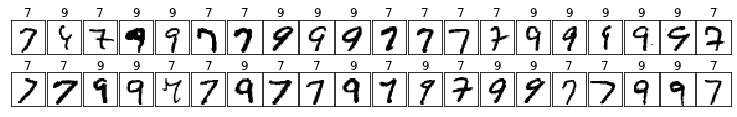

In [6]:
# Show nRows x nColumns images and labels
def showImages(images, labels, nColumns):
    nRows = int(np.ceil(len(labels)/nColumns))
    fig = plt.figure(figsize=(nColumns/2, nRows/1.5)) # width, height
    # Adjust the subplots 
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.2, wspace=0.05)
    i = -1
    for row in range(nRows):
        for column in range(nColumns):
            i += 1
            if (i + 1 > len(labels)): break
            ax = fig.add_subplot(nRows, nColumns, i + 1, xticks=[], yticks=[])
            ax.imshow(images[i], cmap=plt.cm.binary, interpolation='nearest')
            ax.xaxis.label.set_size(8)
            ax.set_title(str(labels[i]), pad=1)
    plt.show()

n_train, n_test = X_train.shape[0], X_test.shape[0]
images_train = X_train.reshape(n_train, resolution, resolution)
images_test = X_test.reshape(n_test, resolution, resolution)
showImages(images_train[:40], y_train[:40], 20)

In [7]:
# Modified from https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html
def plotRoc(fpr, tpr, auc, thresholds, zoomFlag=False):
    plt.figure(figsize=(9, 5))
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (area = %0.3f)' % auc)
    lastF = lastT = 0
    for f, t, th in zip(fpr, tpr, np.round(thresholds, 3)):
        step = 0.05
        if zoomFlag or f - lastF >= step or t - lastT >= step:
            dx = dy = 0
            if f - lastF >= step: 
                lastF = f
                dy = 5
            if t - lastT >= step: 
                lastT = t
                dx = 5
            plt.annotate(str(th), (f, t), fontsize=12, xytext=(dx, dy), textcoords='offset points')
            plt.scatter(f, t, c='black', s=50)
    
    if not zoomFlag:
        plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC')
    plt.legend(loc="lower right")
    plt.show()

# The targil begins here

In [8]:
# Question 1
def predict(model, threshold, X_test):
    hp = model.predict_proba(X_test)
    h = np.where(hp[:,0] >= threshold, 7, 9)
    return h, np.where(h==7, hp[:,0], hp[:,1])

In [9]:
# Question 2
def report(h, hp, y_test):
    from sklearn import metrics
    displayConfusionMatrix(metrics.confusion_matrix(y_test, h), [digit1, digit2], [str(digit1), str(digit2)])
    fltr = (y_test != h)
    showImages(images_test[fltr], h[fltr], 30)
    showImages(images_test[fltr], np.round(hp[fltr], 1), 30)

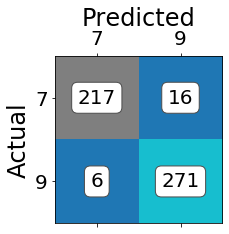

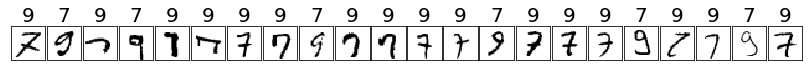

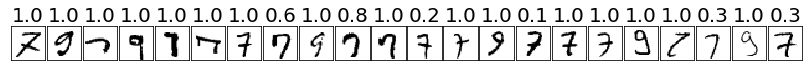

In [14]:
# Question 3
import sklearn
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver = 'newton-cg', random_state = 0)
model.fit(X_train, y_train)
h, hp = predict(model, 0.99, X_test)
report(h, hp, y_test)

In [16]:
# Question 4
from sklearn.metrics import roc_curve, auc
hp = np.round(model.predict_proba(X_test),3)
print(hp)
fpr, tpr, thresholds = roc_curve(y_test, hp[:,1], pos_label=9, drop_intermediate = True)
print(hp[:,1].size, np.unique(hp[:,1]).size, thresholds.size)
print(fpr.size, tpr.size)

[[0. 1.]
 [1. 0.]
 [1. 0.]
 ...
 [0. 1.]
 [0. 1.]
 [1. 0.]]
510 29 17
17 17


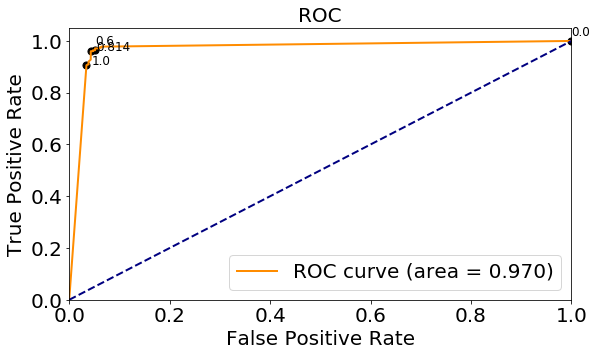

In [17]:
# Question 5
myAuc = auc(fpr, tpr)
plotRoc(fpr, tpr, myAuc, thresholds)

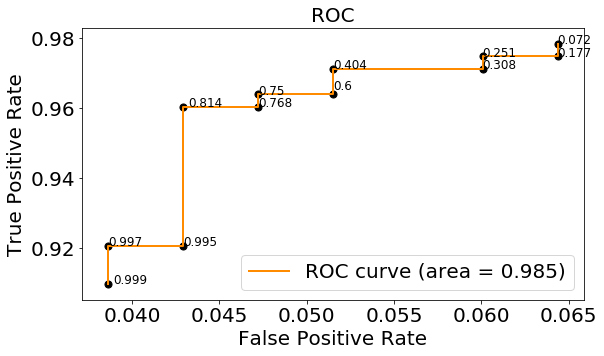

In [13]:
# Question 6
fltr = np.logical_and(thresholds < 0.999, thresholds > 0.001)
plotRoc(fpr[fltr], tpr[fltr], myAuc, thresholds[fltr], zoomFlag = True)